<a href="https://colab.research.google.com/github/V-dit/hotel-booking-analysis/blob/main/Hotel_Booking_Analysis_Final_File.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
# Importing important libraries
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Link the drive to load the data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load the csv as pandas dataframe
filepath = '/content/drive/MyDrive/Colab Notebooks/EDA Capstone Project/Hotel Booking/Hotel Bookings.csv'
hotel_df = pd.read_csv(filepath)

In [4]:
# Viewing the data
hotel_df.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02


In [5]:
hotel_df.tail(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


**Preprocessing:**
1. Inspecting the data. - Here first viewed the information of data with .info() command. However, isnull().sum() serves to be more appealing. Hence, using it to spot the null values.

  1. Inspecting the data for null values
  2. Missing features in the data
  3. Get the basics stastics for each feature.

2. We will create a new dataframe and deal with the null values by replacing it with appropriate values or may be drop them. This way we do not make any changes to the raw data.

**1. Inspecting the data for null values**

In [16]:
# Inspecting the data
hotel_df.isnull().sum().sort_values(ascending = False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

**2.   Missing features in the data**

From this we can device that the following columns have null values, hence first we need to work on correcting these featuers:
'agent', 'company', 'country', 'children'

1. 'agent' - This refers to the agent Id.
  When the field is null, it means those customers/ bookings as direct to hotel, hence we need not omit them from the count. However, we can have a different class defined for them. The data amounts to '16340' rows hence, to retain the data of other associated columns we can replace the null values (NaN) with '0'.

2. 'company' - This refers to the employees belonging to a certain company. Hence if the field is null, it indicates the non employee trips. These could be the self funded trips. While the others could be funded by the company. So, here as well we can replace the null values (NaN) with '0'.

3. 'country'- Ideally every customer must belong to a unique country. Hence this field cannot be empty. We could either drop the rows containing the null values or replace them with mean/median or mode of the data. Here mode might be suitable because it means we will take the value with maximum occurance and fill it in place of the null values. This data is however quite less in number ('488' rows only) when compared to the volume of data. So, it might not have a  significant impact on the analysis.

4. 'children' - Null values may simply imply zero children. This case can be handeled similar to the preivous one. However, the impact on analysis will be low as the number of rows is just '4'.

**3.   Get the basics stastics for each feature.**

In [19]:
# To get the basic statistical data of each column. This can be used to draw useful conclusions in different aspects.
hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [21]:
# Viewing all the column names
hotel_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [22]:
# Creating a copy of the dataframe to avoid manipulation of the raw data.
df = hotel_df.copy()

**Replacing the null values:**

In [24]:
# Replace the NaN values in 'agent'and 'company' columns with 0.
df[['agent', 'company']] = df[['agent', 'company']].fillna(0)

In [26]:
# Finding the mode of country to get the country name with maximum occurance.
df['country'].mode()
# Here, we found portuguese as the maximum occurance. So we replace the nan values with the same.

0    PRT
dtype: object

In [27]:
# Replace the NaN values in 'agent'and 'company' columns with 0.
df['country'] = df['country'].fillna(df['country'].mode())

In [28]:
# Replace the NaN values in 'children' column with 0.
df['children'] = df['children'].fillna(0)

**Looking at the data types of each feature.**

In [30]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [32]:
# Convert 'çhildren' from float to integer.
df['children'] = df['children'].astype('int64')
# Convert 'agent' from float to integer.
df['agent'] = df['agent'].astype('int64')
# Convert 'company' from float to integer.
df['company'] = df['company'].astype('int64')

**Creating Functions:**

In [33]:
# To find the percentage value for any column
def convert_to_percentage(pdseries, limit = None):
  if limit != None:
    pdseries = pdseries.value_counts()[:limit]
  else:
    pdseries = pdseries.value_counts()
  x = pdseries.index
  y = (pdseries/pdseries.sum()) * 100

  return x, y

In [34]:
# To plot any type of graph
# def plot_graph(x,y,x_lable = None, y_label = None, figsize=(10,5), type='bar', title=None, subplot=None):
  
#   if x_label != None:
#     plot.set_xlabel(x_label)
#   if y_label != None:
#     plot.set_ylabel(y_label)
#   if title != None:
#     plot.set_title(title)
  
#   if type == 'bar':
#     sns.barplot(x,y,plot)


**Getting the names of hotels**

In [35]:
# Getting the names of all hotels included in the data.
hotel_names = df['hotel'].unique()
print(f'The hotel names are: {hotel_names}')

The hotel names are: ['Resort Hotel' 'City Hotel']


**Basic Analysis of Agents:**

In [36]:
# Getting the list of agents in the list
agent_ids = sorted(df['agent'].dropna().unique())
print(f'The agent ids are: {agent_ids}')

# Total number of agents in the list
print(f'The total number of agents in the above list is: {len(agent_ids)}')

# How many bookings came through agents
not_by_agent = df['agent'].isna().sum()
print(f'Total bookings that came by means of agents is: {119390 - int(not_by_agent)}/119390')

The agent ids are: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45, 47, 50, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 63, 64, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 77, 78, 79, 81, 82, 83, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 98, 99, 103, 104, 105, 106, 107, 110, 111, 112, 114, 115, 117, 118, 119, 121, 122, 126, 127, 128, 129, 132, 133, 134, 135, 138, 139, 141, 142, 143, 144, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 162, 163, 165, 167, 168, 170, 171, 173, 174, 175, 177, 179, 180, 181, 182, 183, 184, 185, 187, 191, 192, 193, 195, 196, 197, 201, 205, 208, 210, 211, 213, 214, 215, 216, 219, 220, 223, 227, 229, 232, 234, 235, 236, 240, 241, 242, 243, 244, 245, 247, 248, 249, 250, 251, 252, 253, 254, 256, 257, 258, 261, 262, 265, 267, 269, 270, 273, 275, 276, 278, 280, 281, 282, 283, 285, 286, 287, 288, 289, 290, 291, 294, 295, 296, 298

**Basic Analysis of possible Company tours and/ or personal tour :**

In [37]:
# Getting the ids of all companies included in the data
company_ids = sorted(df['company'].dropna().unique())
print(f'The company ids are: {company_ids}')

# Total number of companies in the list
print(f'The total number of companies in the above list is: {len(company_ids)}')

# Total bookings that do not belong to any company
private_customers = df['company'].isna().sum()
print(f'Total {private_customers} customers do not belong to any company.')

The company ids are: [0, 6, 8, 9, 10, 11, 12, 14, 16, 18, 20, 22, 28, 29, 31, 32, 34, 35, 37, 38, 39, 40, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 59, 61, 62, 64, 65, 67, 68, 71, 72, 73, 76, 77, 78, 80, 81, 82, 83, 84, 85, 86, 88, 91, 92, 93, 94, 96, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 112, 113, 115, 116, 118, 120, 122, 126, 127, 130, 132, 135, 137, 139, 140, 142, 143, 144, 146, 148, 149, 150, 153, 154, 158, 159, 160, 163, 165, 167, 168, 169, 174, 178, 179, 180, 183, 184, 185, 186, 192, 193, 195, 197, 200, 202, 203, 204, 207, 209, 210, 212, 213, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 227, 229, 230, 232, 233, 234, 237, 238, 240, 242, 243, 245, 246, 250, 251, 253, 254, 255, 257, 258, 259, 260, 263, 264, 268, 269, 270, 271, 272, 273, 274, 275, 277, 278, 279, 280, 281, 282, 284, 286, 287, 288, 289, 290, 291, 292, 293, 297, 301, 302, 304, 305, 307, 308, 309, 311, 312, 313, 314, 316, 317, 318, 319, 320, 321, 323, 324, 325, 329, 330, 331, 332, 333, 33

**Basic Analysis of Countries:**

In [38]:
# Getting the country of origin for customers included in the data
countrywise_customer = sorted(df['country'].dropna().unique())
print(f'The customers come from these countries: {countrywise_customer}')

# Total number of countries in the list
print(f'Customers from {len(company_ids)} different countries visited these two hotels.')

The customers come from these countries: ['ABW', 'AGO', 'AIA', 'ALB', 'AND', 'ARE', 'ARG', 'ARM', 'ASM', 'ATA', 'ATF', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BFA', 'BGD', 'BGR', 'BHR', 'BHS', 'BIH', 'BLR', 'BOL', 'BRA', 'BRB', 'BWA', 'CAF', 'CHE', 'CHL', 'CHN', 'CIV', 'CMR', 'CN', 'COL', 'COM', 'CPV', 'CRI', 'CUB', 'CYM', 'CYP', 'CZE', 'DEU', 'DJI', 'DMA', 'DNK', 'DOM', 'DZA', 'ECU', 'EGY', 'ESP', 'EST', 'ETH', 'FIN', 'FJI', 'FRA', 'FRO', 'GAB', 'GBR', 'GEO', 'GGY', 'GHA', 'GIB', 'GLP', 'GNB', 'GRC', 'GTM', 'GUY', 'HKG', 'HND', 'HRV', 'HUN', 'IDN', 'IMN', 'IND', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JAM', 'JEY', 'JOR', 'JPN', 'KAZ', 'KEN', 'KHM', 'KIR', 'KNA', 'KOR', 'KWT', 'LAO', 'LBN', 'LBY', 'LCA', 'LIE', 'LKA', 'LTU', 'LUX', 'LVA', 'MAC', 'MAR', 'MCO', 'MDG', 'MDV', 'MEX', 'MKD', 'MLI', 'MLT', 'MMR', 'MNE', 'MOZ', 'MRT', 'MUS', 'MWI', 'MYS', 'MYT', 'NAM', 'NCL', 'NGA', 'NIC', 'NLD', 'NOR', 'NPL', 'NZL', 'OMN', 'PAK', 'PAN', 'PER', 'PHL', 'PLW', 'POL', 'PRI', 'PRT', 'PRY', 

**For each hotel, looking at the number of countries from which the customers come:**

In [39]:
# Groupby Hotel Name to get the country of origin of customers for each hotels.
grouped_hotel_country = df.groupby(['hotel'])['country']

# Get list of countires for each hotel
resort_hotel_country_list = grouped_hotel_country.get_group('Resort Hotel').unique()
city_hotel_country_list = grouped_hotel_country.get_group('City Hotel').unique()

print(f'Hotel "Resort Hotel" has got customers visiting from {len(resort_hotel_country_list)} different countries.')
print(f'Hotel "City Hotel" has got customers visiting from {len(city_hotel_country_list)} different countries.')

Hotel "Resort Hotel" has got customers visiting from 126 different countries.
Hotel "City Hotel" has got customers visiting from 167 different countries.


([<matplotlib.patches.Wedge at 0x7f92c5fff550>,
 [Text(-0.956416133381298, -0.5433858480011854, 'City Hotel'),
  Text(0.9564161333812984, 0.5433858480011848, 'Resort Hotel')],
 [Text(-0.5216815272988897, -0.29639228072791923, '66.4%'),
  Text(0.52168152729889, 0.29639228072791896, '33.6%')])

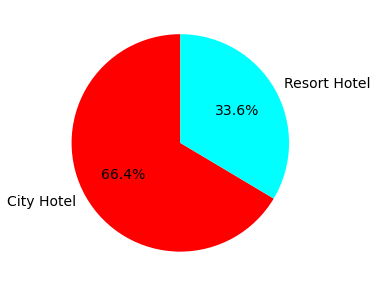

In [50]:
# Plotting the data in pie chart.
plt.rcParams['figure.figsize'] = 5,5
labels = df['hotel'].value_counts().index.tolist()
values = df['hotel'].value_counts().tolist()
colors = ['red','cyan']
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})

In [54]:
hotel_adults = df.groupby(['hotel'])['adults']
hotel_adults.describe()

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,79330.0,1.850977,0.509292,0.0,2.0,2.0,2.0,4.0
Resort Hotel,40060.0,1.867149,0.697285,0.0,2.0,2.0,2.0,55.0


In [68]:
def countplot(data, x, hue, title = None):
  plot = sns.countplot(data=data, x = x, hue = hue)
  plt.legend(loc='upper right')
  plot.set_title(title)
  plt.xticks(rotation=90)
  plt.show()

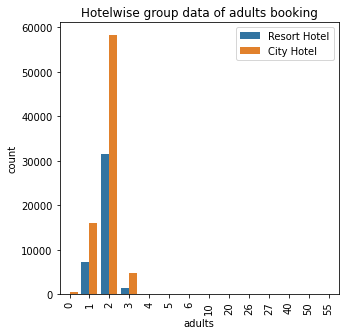

In [69]:
# Using countplot function
countplot(data = df[['hotel','adults']], x = 'adults', hue = 'hotel', title = 'Hotelwise group data of adults booking')

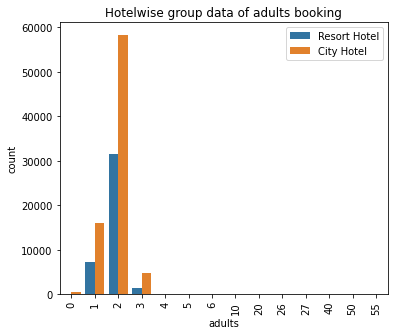

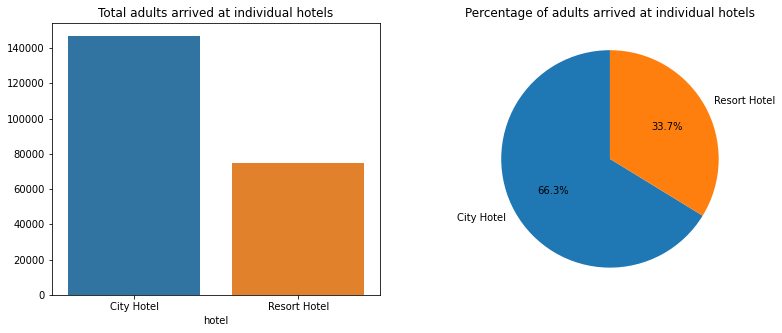

In [112]:
df_adults = df.groupby(['hotel'])['adults'].sum()
plt.rcParams['figure.figsize'] = 20, 5

plt.subplot(1,3,1)
countplot(data = df[['hotel','adults']], x = 'adults', hue = 'hotel', title = 'Hotelwise group data of adults booking')
plt.title('Bookingwise adults count for individual hotels')

plt.subplot(1,3,2)
sns.barplot(x = df_adults.index, y = df_adults.values)
plt.title('Total adults arrived at individual hotels')

plt.subplot(1,3,3)
plt.pie(df_adults, labels=df_adults.index, autopct='%1.1f%%',startangle=90)
plt.title('Percentage of adults arrived at individual hotels')
plt.show()

Text(0.5, 1.0, 'Percentage of adults arrived at individual hotels')

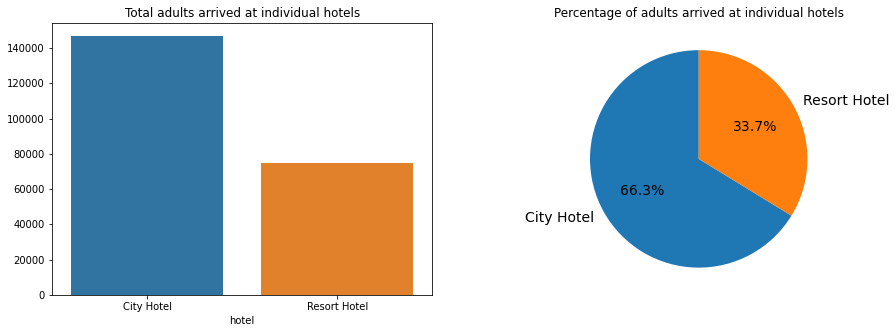

In [102]:
df_adults = df.groupby(['hotel'])['adults'].sum()
plt.rcParams['figure.figsize'] = 15, 5
plt.subplot(1,2,1)
sns.barplot(x = df_adults.index, y = df_adults.values)
plt.title('Total adults arrived at individual hotels')

plt.subplot(1,2,2)
plt.pie(df_adults, labels=df_adults.index, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})
plt.title('Percentage of adults arrived at individual hotels')

In [ ]:
hotel_children = df_nonull.groupby(['hotel'])['children']
hotel_children.describe()

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,79302.0,0.091397,0.372230,0.0,0.0,0.0,0.0,3.0
Resort Hotel,39596.0,0.129862,0.447192,0.0,0.0,0.0,0.0,10.0


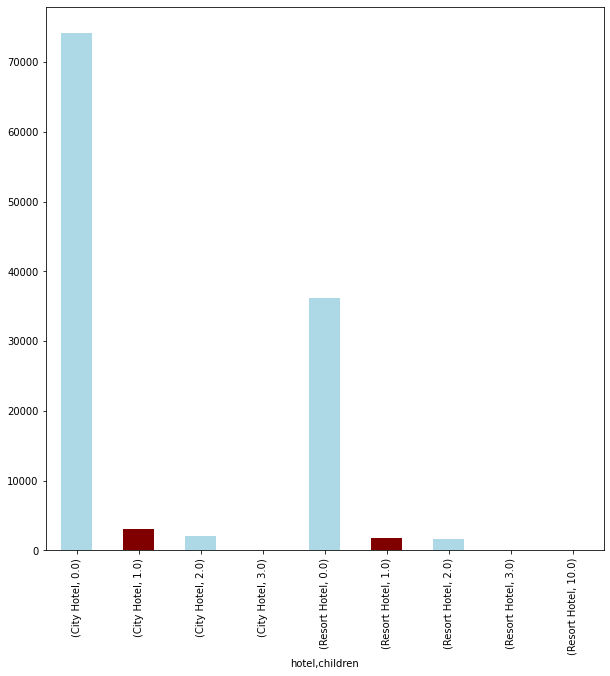

In [ ]:
# Plotting the data for adults based on the number of children per booking.
hotel_children.value_counts().plot(kind = 'bar', color = ['lightblue', 'maroon'])

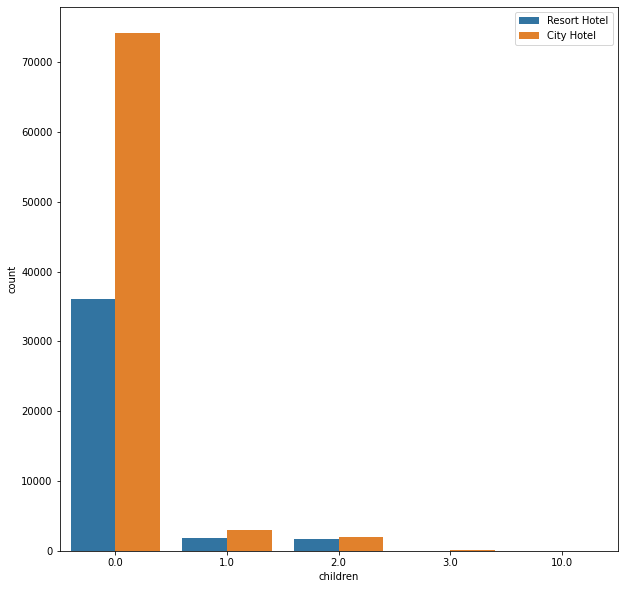

In [ ]:
# Replacement of above graph
list_hotel_children = ['hotel','children']
children_df_list = df_nonull[list_hotel_children]
sns.countplot(data = children_df_list, x = 'children', hue = 'hotel')
plt.legend(loc='upper right')

In [ ]:
hotel_babies = df_nonull.groupby(['hotel'])['babies']
hotel_babies.describe()

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,79302.0,0.004943,0.084338,0.0,0.0,0.0,0.0,10.0
Resort Hotel,39596.0,0.013966,0.119061,0.0,0.0,0.0,0.0,2.0


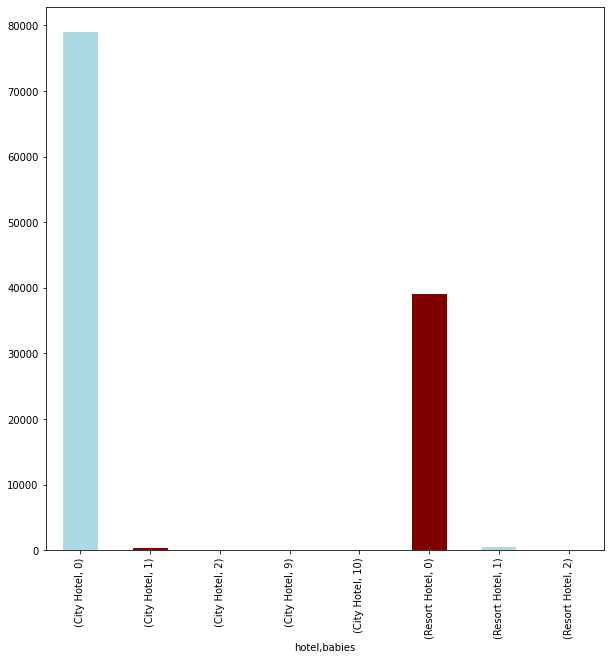

In [ ]:
# Plotting the data for adults based on the number of babies per booking.
hotel_babies.value_counts().plot(kind = 'bar', color = ['lightblue', 'maroon'])

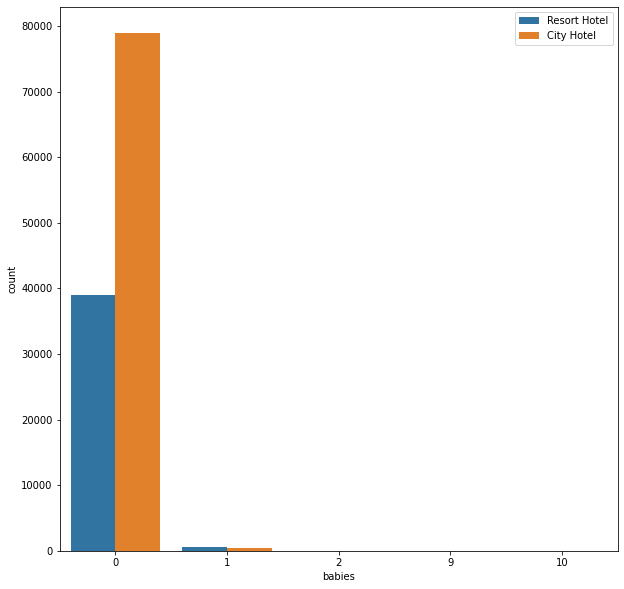

In [ ]:
# Replacement of above graph
list_hotel_babies = ['hotel','babies']
babies_df_list = df_nonull[list_hotel_babies]
sns.countplot(data = babies_df_list, x = 'babies', hue = 'hotel')
plt.legend(loc='upper right')

The above bar chart is a bit off to visualize the data. Hence, need to plot a different type of graph which might be self explanatory.

**Now, let's have a look at the cancelled booking.**

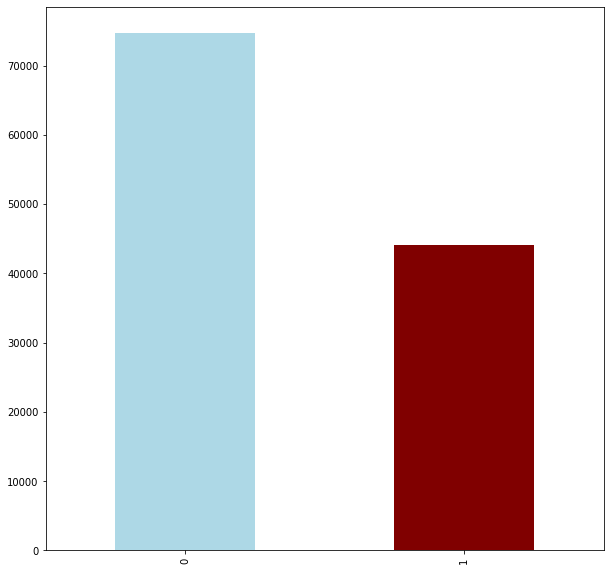

In [ ]:
# Analysing the cancelled bookings:
cancellation_data = df_nonull['is_canceled']
cancellation_data

# Plotting the count plot of this using seaborn's count plot feature
cancellation_data.value_counts().plot(kind = 'bar', color = ['lightblue', 'maroon'])

# Here, 0 means Not Cancelled while 1 means Cancelled.

From the above graph it is evident that the about 4000+ bookings were cancelled. We can not plot a pie chart to view the percentage of it as well.

([<matplotlib.patches.Wedge at 0x7f14b8b7de90>,
 [Text(-1.0113763824572926, -0.4325711652521476, '0'),
  Text(1.1033196457713303, 0.47189591993894836, '1')],
 [Text(-0.551659844976705, -0.23594790831935322, '62.9%'),
  Text(0.6436031266999426, 0.2752726199643865, '37.1%')])

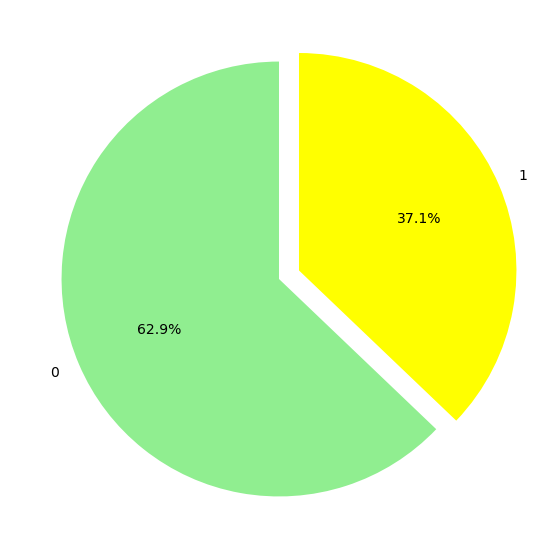

In [ ]:
# Plotting the pie chart to view percentage of cancellation.
plt.rcParams['figure.figsize'] = 10,10
labels = cancellation_data.value_counts().index.tolist()
sizes = cancellation_data.value_counts().tolist()
explode = [0,0.1]
colors = ['lightgreen','yellow']
plt.pie(sizes, labels = labels, colors=colors, explode = explode, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})

So, this indicates that 37.1 % of the bookings were cancelled.
Note: Here we have replaced the values of 0 and 1 by Cancelled and Not Cancelled. This is done manually at the graph level. In case of change in order by mistake, it would be misleading. Hence, it is preferable to replace the values of 0 and 1 by the respective values.

To further this, we can have a look at the cancellation for individual hotels. Hence, group by the data and complete the task.

In [ ]:
# Analysing the data for individual hotels
cancellation_data_hotelwise = df_nonull.groupby(['hotel'])['is_canceled']
cancellation_data_hotelwise.describe()

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,79302.0,0.417089,0.493081,0.0,0.0,0.0,1.0,1.0
Resort Hotel,39596.0,0.279750,0.448882,0.0,0.0,0.0,1.0,1.0


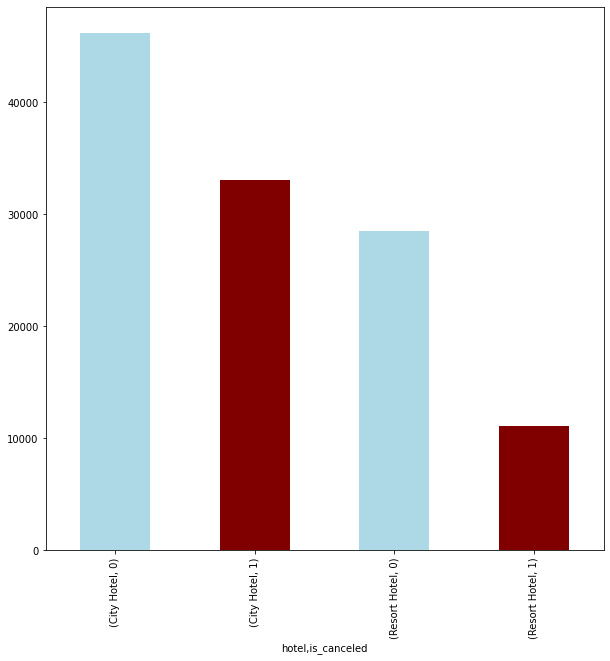

In [ ]:
cancellation_data_hotelwise.value_counts().plot(kind = 'bar', color = ['lightblue', 'maroon'])
# Here, we need to replace the value of 0 and 1 by not - çancelled and cancelled respectively.
# This might be difficult with the groupby function hence, may be we can make a list of these two columns and proceed.

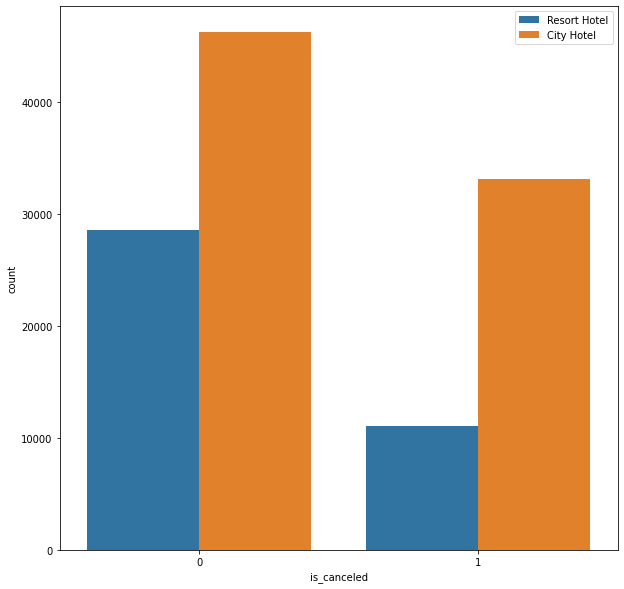

In [ ]:
# Plotting the above data with new logic
booking_cancellation = ['hotel','is_canceled']
intermediate_list = df_nonull[booking_cancellation]
sns.countplot(data = intermediate_list, x = 'is_canceled', hue = 'hotel')
plt.legend(loc='upper right')

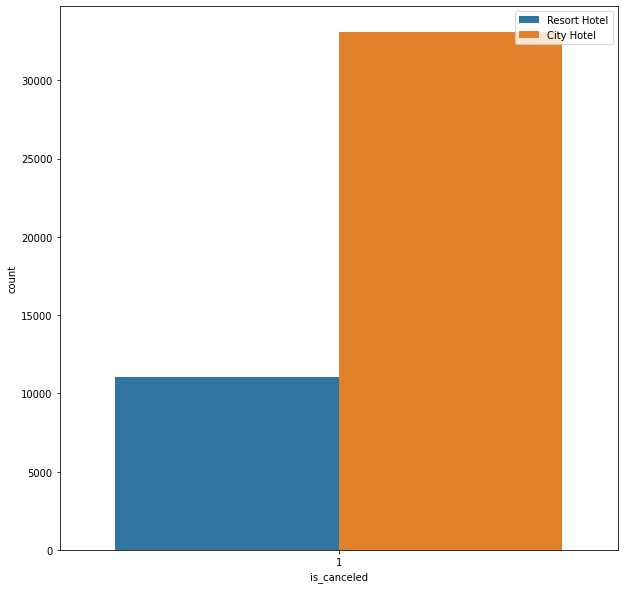

In [ ]:
# Plotting different columns for the cancelled and not cancelled data
booking_cancellation = ['hotel','is_canceled']
intermediate_list = df_nonull[booking_cancellation]
new = intermediate_list.loc[(intermediate_list != 0).all(axis = 1)]
sns.countplot(data = new, x = 'is_canceled', hue = 'hotel')
plt.legend(loc='upper right')

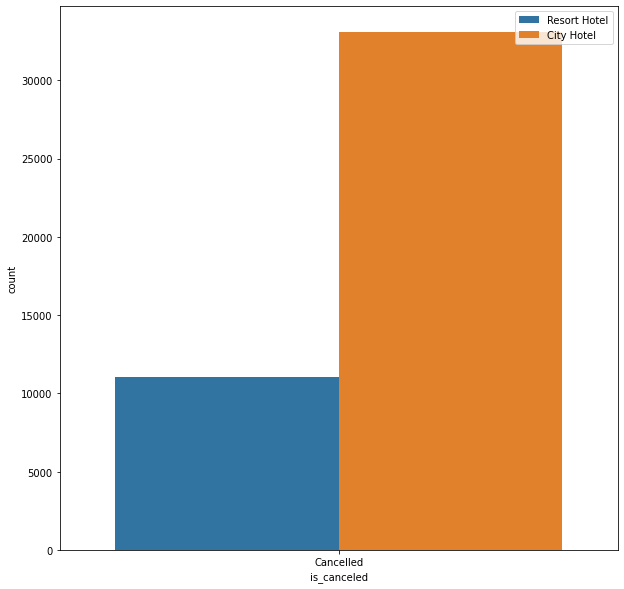

In [ ]:
# Trying to replace 0 and 1:
temp_df = df_nonull.copy()
booking_cancellation = ['hotel','is_canceled']
temp_df.loc[temp_df['is_canceled'] == 0, 'is_canceled'] = 'Not Cancelled'
temp_df.loc[temp_df['is_canceled'] == 1, 'is_canceled'] = 'Cancelled'
intermediate_list = temp_df[booking_cancellation]
new = intermediate_list.loc[(intermediate_list != 'Not Cancelled').all(axis = 1)]
sns.countplot(data = new, x = 'is_canceled', hue = 'hotel')
plt.legend(loc='upper right')

In [ ]:
# Previously Cancelled
a111 = df_nonull[['hotel', 'previous_cancellations', 'previous_bookings_not_canceled']]
a111.describe()

,previous_cancellations,previous_bookings_not_canceled
count,118898.000000,118898.000000
mean,0.087142,0.131634
std,0.845869,1.484672
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,26.000000,72.000000


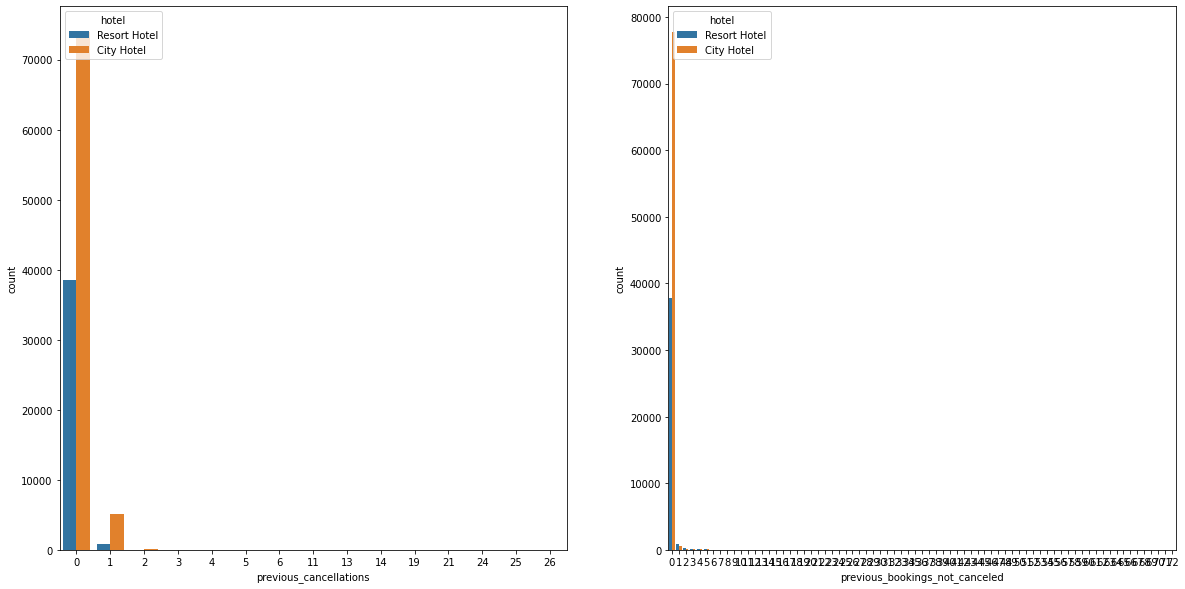

In [ ]:
# Plotting the above data
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.countplot(data = a111, x = 'previous_cancellations', hue = 'hotel')
plt.subplot(1,2,2)
sns.countplot(data = a111, x = 'previous_bookings_not_canceled', hue = 'hotel')

**Now, looking at the arrival period:**

In [ ]:
df_nonull.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

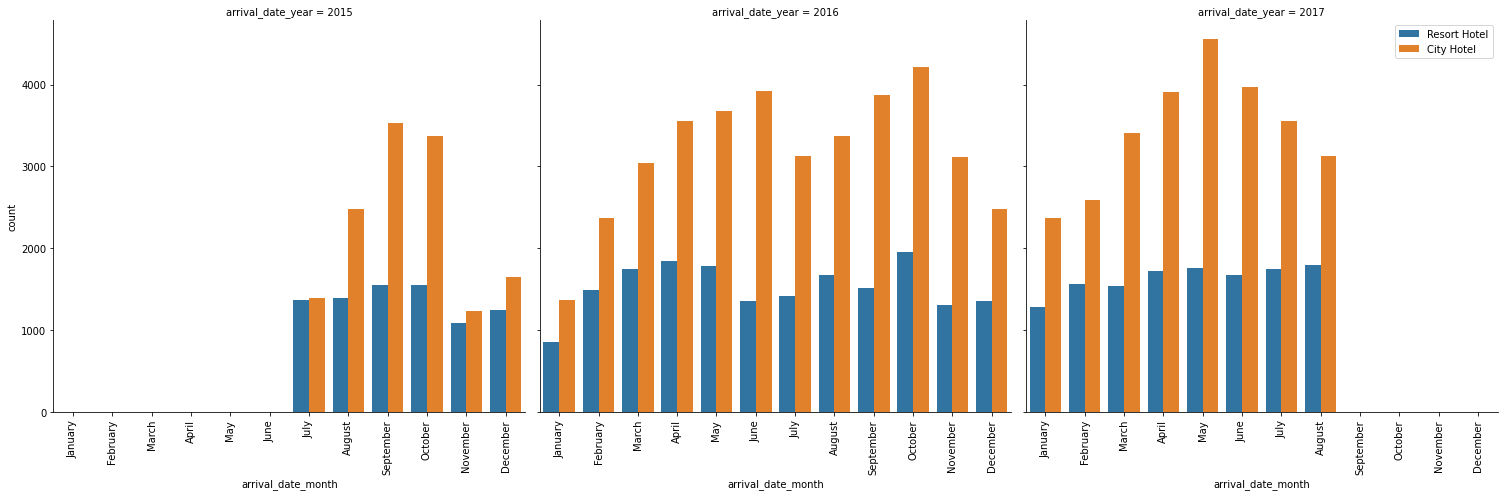

In [ ]:
order_months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
arrival_list = ['hotel', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number',
              'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights']
a = df_nonull[arrival_list]
plot = sns.catplot(x = 'arrival_date_month', hue = 'hotel', col = 'arrival_date_year',
            data = a, kind="count", height=7, aspect=1, order = order_months, legend = False)
plt.legend(loc='upper right')
# The labels on x-axis are not readable as they overlap each other. We need to rotate them
# These are called as xticks. Tried a number of simpler approahes, however the below mentioned one
# is the only solution that I got so far.
# To rotate the x ticks.
for axes in plot.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.tight_layout()

From this we can see the trend in arrival wrt month for all the three years.

In [ ]:
a.head(5)

,hotel,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights
0,Resort Hotel,2015,July,27,1,0,0
1,Resort Hotel,2015,July,27,1,0,0
2,Resort Hotel,2015,July,27,1,0,1
3,Resort Hotel,2015,July,27,1,0,1
4,Resort Hotel,2015,July,27,1,0,2


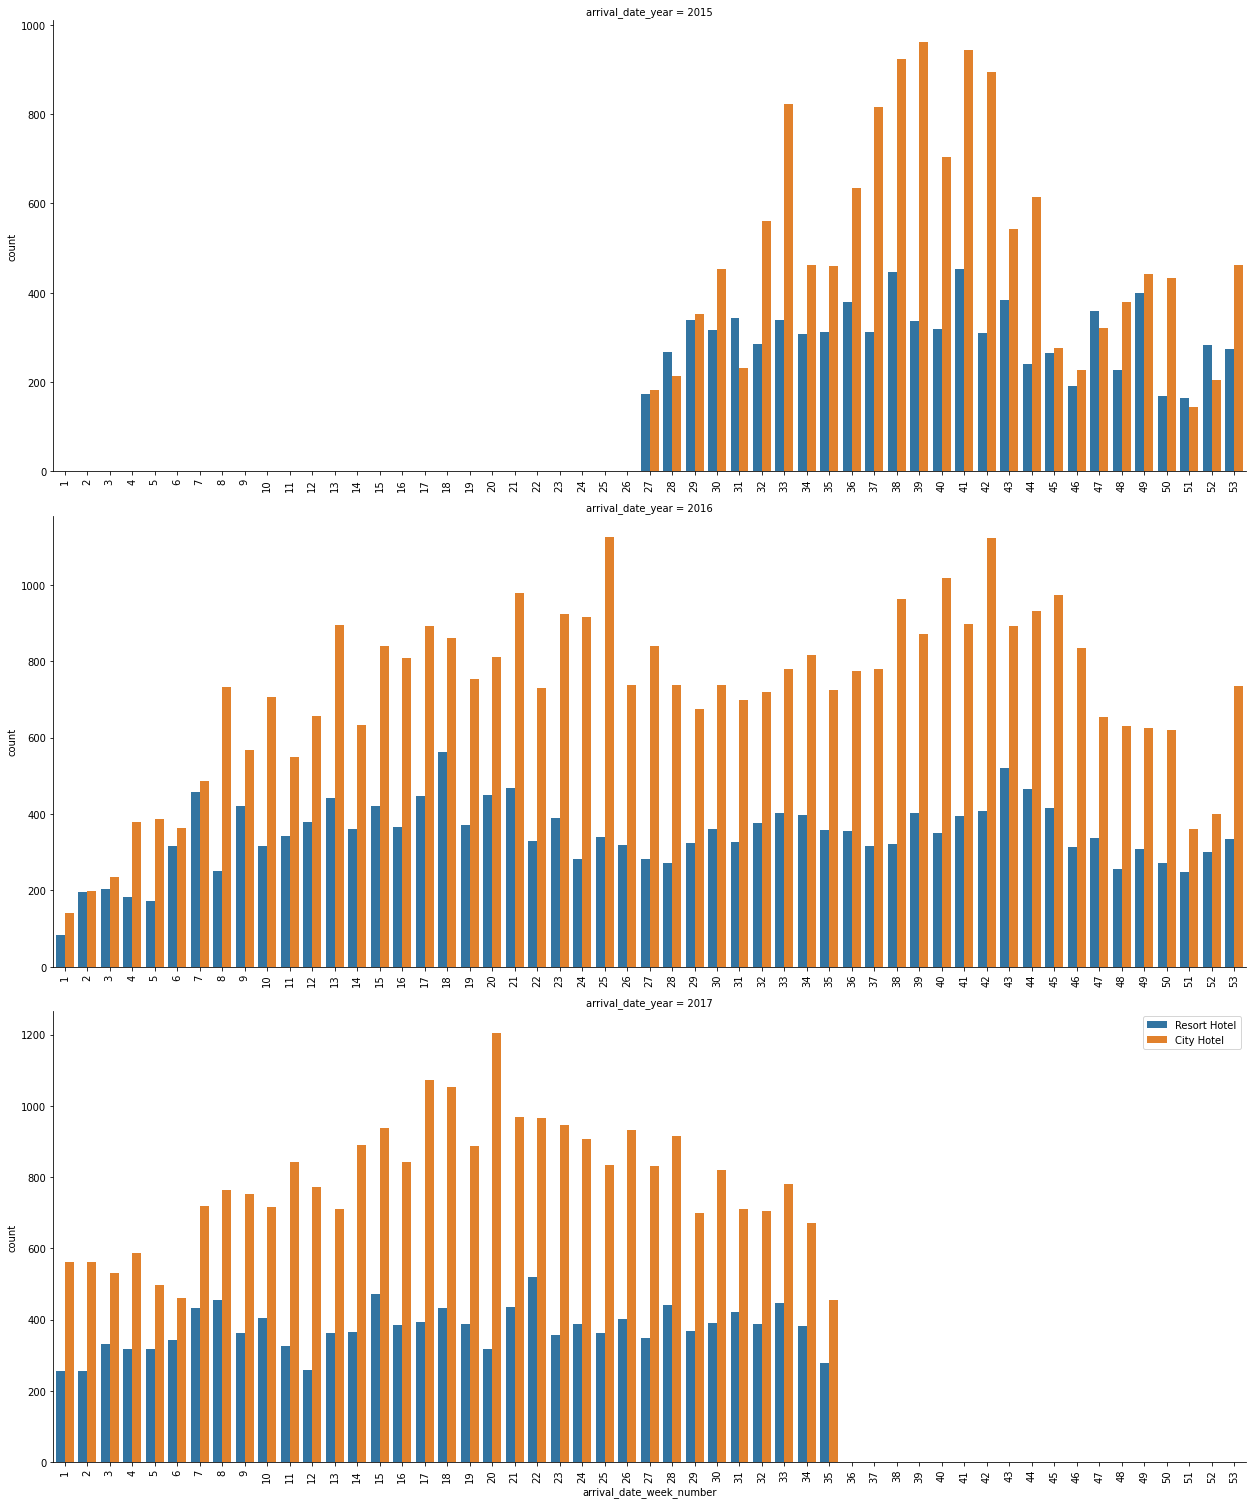

In [ ]:
week_order = list(range(1,54))
plot = sns.catplot(x = 'arrival_date_week_number', hue = 'hotel', col = 'arrival_date_year',col_wrap=1, 
            data = a, kind="count", height=7, aspect=2.5, order = week_order, legend = False, legend_out = True, sharex=False, sharey=False)
plt.legend(loc='upper right')
for axes in plot.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.tight_layout()

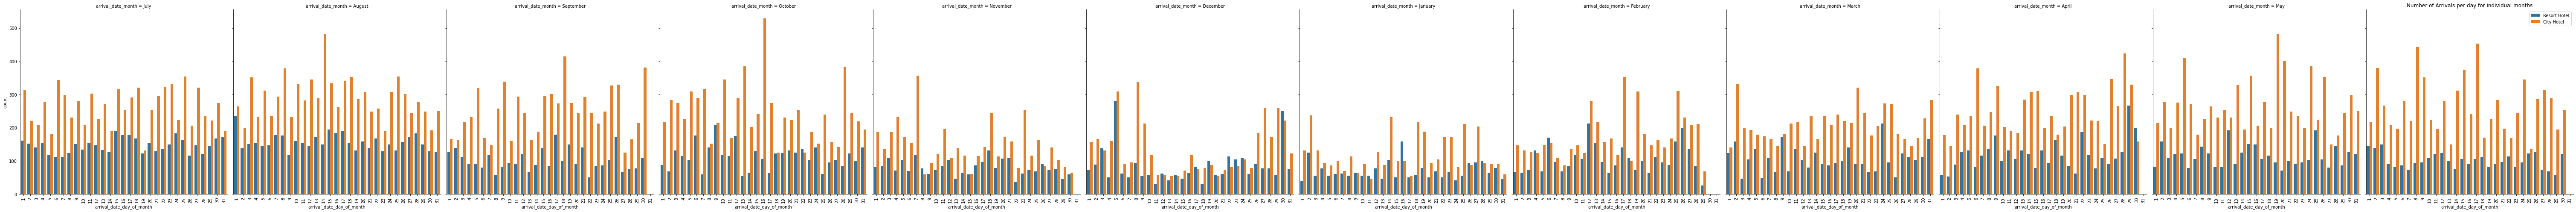

In [ ]:
# Find how to arrange the order of the columns, coz here the order_month does not work.
# This is because it represents the month, where as here for x axis we have days (1-31). Hnce, it does not work.
plot = sns.catplot(x = 'arrival_date_day_of_month', hue = 'hotel', col = 'arrival_date_month',
            data = a, kind="count", height=7, aspect=1, legend = False)
plt.legend(loc='upper right')
plt.title('Number of Arrivals per day for individual months')
for axes in plot.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.tight_layout()

Text(0.5, 1.0, 'Number of Arrivals per day')

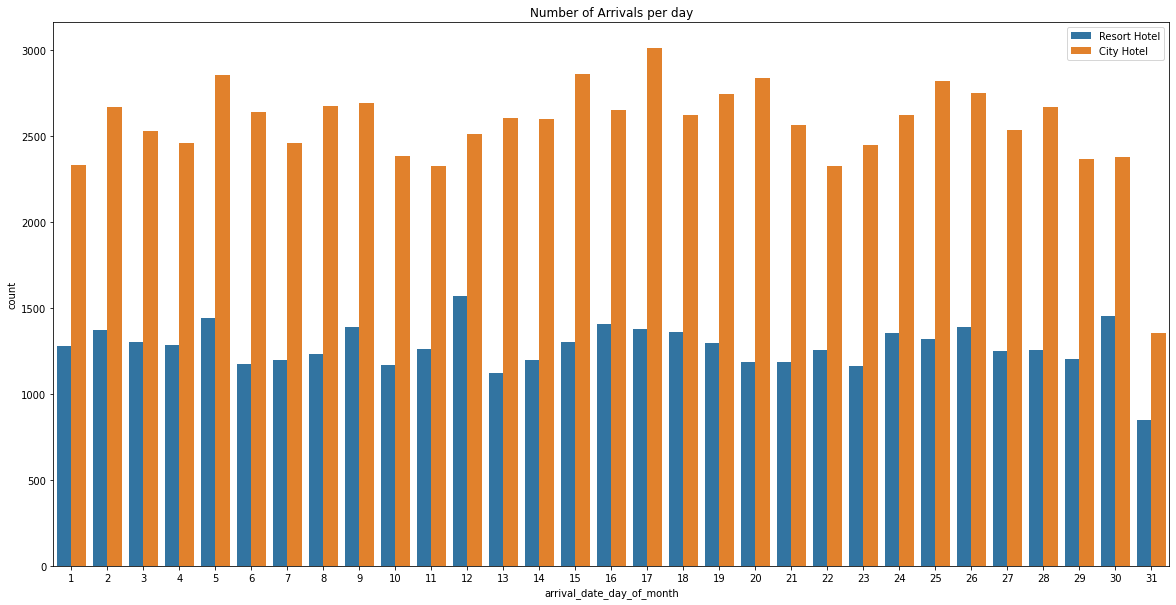

In [ ]:
plt.figure(figsize=(20,10))
plot = sns.countplot(data = a, x = 'arrival_date_day_of_month', hue = 'hotel')
plt.legend(loc='upper right')
plt.title('Number of Arrivals per day')

Text(0.5, 1.0, 'Number of Stays on weekend nights')

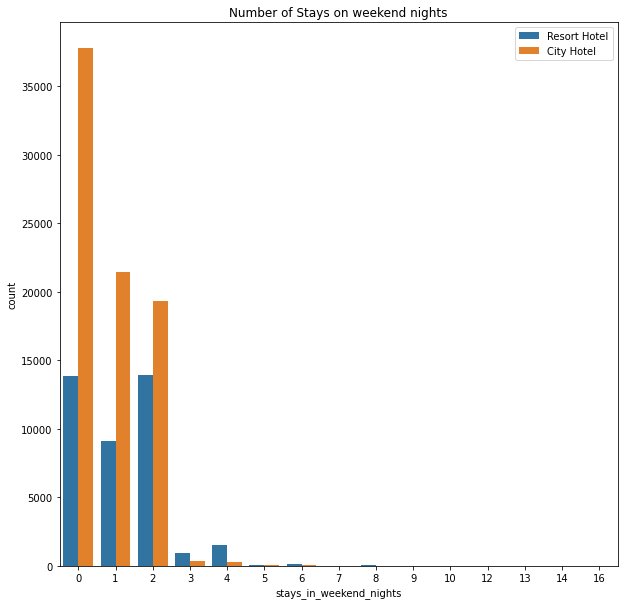

In [ ]:
# To show weekend night stays vs week night stays.
plot = sns.countplot(data = a, x = 'stays_in_weekend_nights', hue = 'hotel')
plt.legend(loc='upper right')
plt.title('Number of Stays on weekend nights')

Text(0.5, 1.0, 'Number of Stays on weekend nights')

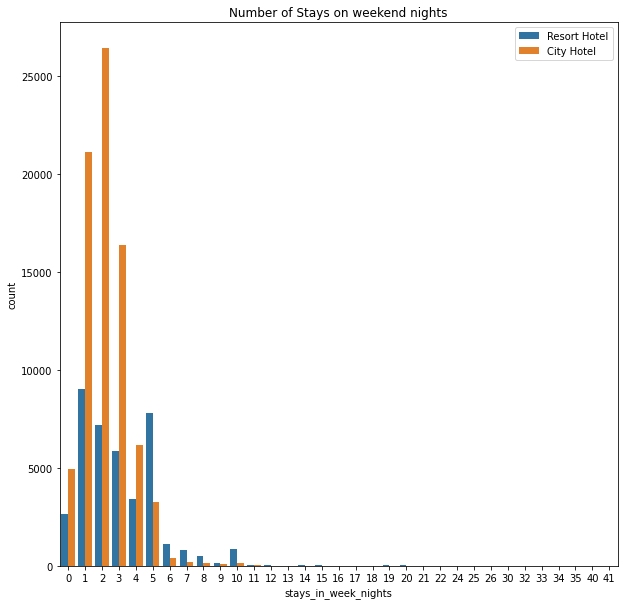

In [ ]:
plot = sns.countplot(data = a, x = 'stays_in_week_nights', hue = 'hotel')
plt.legend(loc='upper right')
plt.title('Number of Stays on weekend nights')

In [ ]:
df_nonull.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
df_nonull.market_segment.unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Aviation'], dtype=object)

**Analysing the bookings for individual market segments**

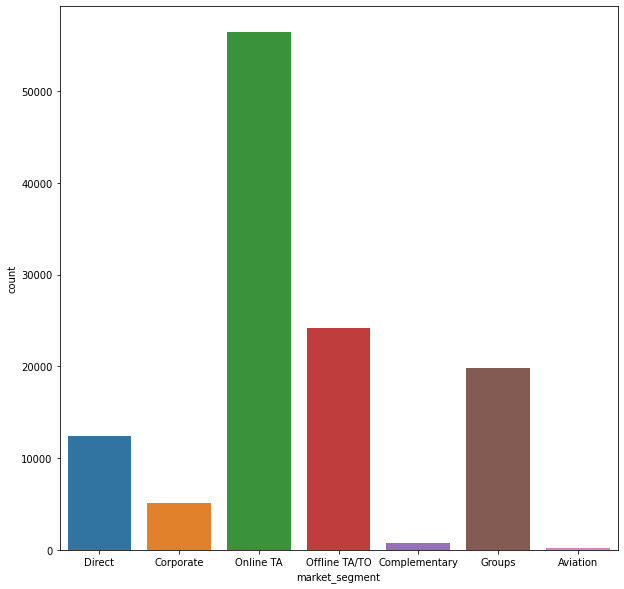

In [ ]:
# Total bookings count from individual market segement
sns.countplot(data = df_nonull, x = 'market_segment')

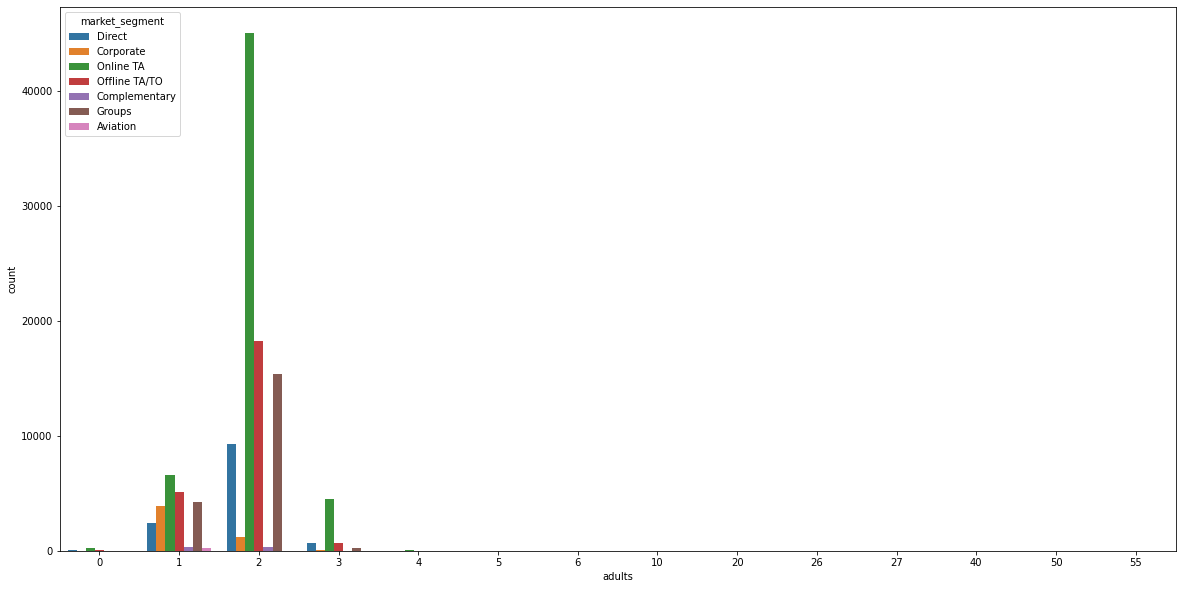

In [ ]:
# Adultswise market segment
plt.figure(figsize=(20,10))
sns.countplot(data = df_nonull, x = 'adults', hue = 'market_segment')

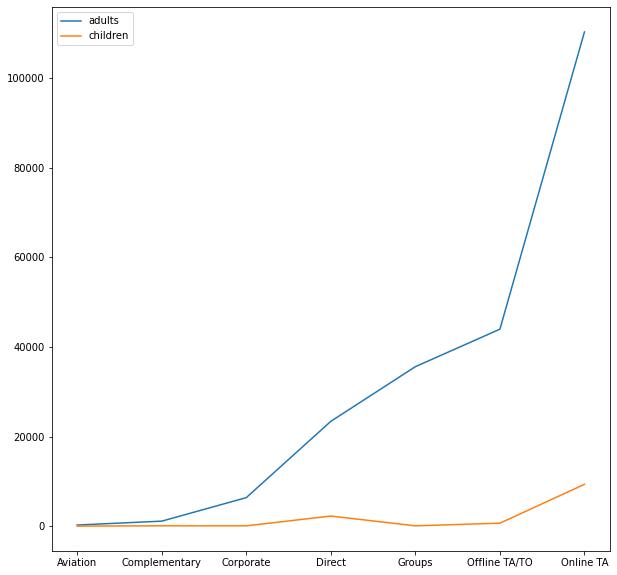

In [ ]:
# This is a better graph as it counts the total number of adults/children against each market segment.
m1 = df_nonull.groupby('market_segment').sum()
plt.plot(m1['adults'])
plt.plot(m1['children'])
plt.legend(['adults', 'children'])

In [ ]:
m1

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
market_segment,,,,,,,,,,,,,,,,,,
Aviation,52,1053,477902,5946,3723,259,596,238,0.0,0,64,13,102,62,0,23733.68,6,27
Complementary,90,9872,1479788,20925,11372,260,959,1102,61.0,22,230,162,1524,246,39,2144.57,84,693
Corporate,978,116157,10304184,133153,80328,2284,8512,6352,53.0,16,1473,871,10418,1597,819,359220.15,557,1176
Direct,1920,624394,25097495,329860,198052,10636,29197,23387,2241.0,285,794,222,1541,4934,511,1443255.68,2074,7141
Groups,12097,3704006,39928650,539787,317455,15624,43648,35592,58.0,13,270,5428,316,4193,126853,1573915.32,282,1725
Offline TA/TO,8278,3261937,48706174,700692,377145,25460,68855,43961,652.0,178,379,2758,555,3905,148771,2112380.70,550,6485
Online TA,20738,4685002,113722920,1499686,890618,55921,145733,110327,9325.0,431,596,907,1195,11361,129,6613331.43,3805,50725


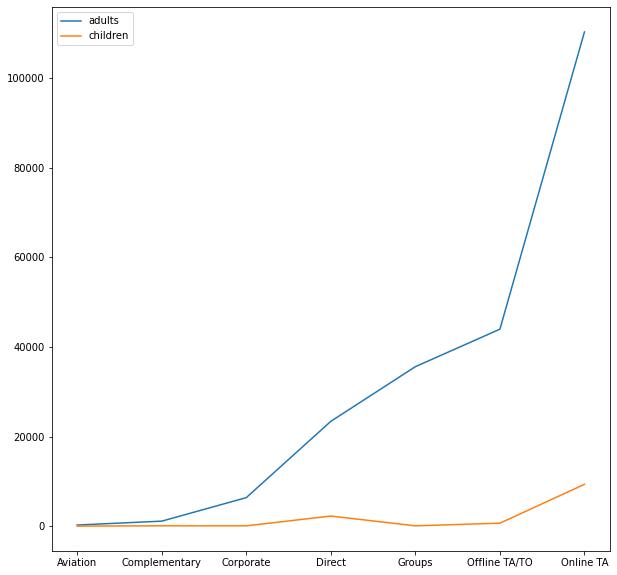

In [ ]:
# Doing the same for hotelwise data
m2 = df_nonull.groupby(['hotel', 'market_segment']).sum()
plt.plot(m1['adults'])
plt.plot(m1['children'])
plt.legend(['adults', 'children'])

In [ ]:
m2

is_canceled  lead_time  arrival_date_year  \
hotel        market_segment                                              
City Hotel   Aviation                 52       1053             477902   
             Complementary            57       5849            1078573   
             Corporate               640      76383            6017978   
             Direct                 1055     312918           12280894   
             Groups                 9623    2728263           28170975   
             Offline TA/TO          7159    2366950           33733484   
             Online TA             14490    3211200           78126867   
Resort Hotel Complementary            33       4023             401215   
             Corporate               338      39774            4286206   
             Direct                  865     311476           12816601   
             Groups                 2474     975743           11757675   
             Offline TA/TO          1119     894987           14972690   
             Online TA              6248    1473802           35596053   

                             arrival_date_week_number  \
hotel        market_segment                             
City Hotel   Aviation                            5946   
             Complementary                      15098   
             Corporate                          77587   
             Direct                            162710   
             Groups                            387312   
             Offline TA/TO                     490855   
             Online TA                        1015410   
Resort Hotel Complementary                       5827   
             Corporate                          55566   
             Direct                            167150   
             Groups                            152475   
             Offline TA/TO                     209837   
             Online TA                         484276   

                             arrival_date_day_of_month  \
hotel        market_segment                              
City Hotel   Aviation                             3723   
             Complementary                        7936   
             Corporate                           47342   
             Direct                              96133   
             Groups                             228632   
             Offline TA/TO                      260534   
             Online TA                          607706   
Resort Hotel Complementary                        3436   
             Corporate                           32986   
             Direct                             101919   
             Groups                              88823   
             Offline TA/TO                      116611   
             Online TA                          282912   

                             stays_in_weekend_nights  stays_in_week_nights  \
hotel        market_segment                                                  
City Hotel   Aviation                            259                   596   
             Complementary                       164                   628   
             Corporate                          1188                  4481   
             Direct                             4671                 12859   
             Groups                             9406                 26174   
             Offline TA/TO                     12215                 36395   
             Online TA                         35169                 91975   
Resort Hotel Complementary                        96                   331   
             Corporate                          1096                  4031   
             Direct                             5965                 16338   
             Groups                             6218                 17474   
             Offline TA/TO                     13245                 32460   
             Online TA                         20752                 53758   

                    

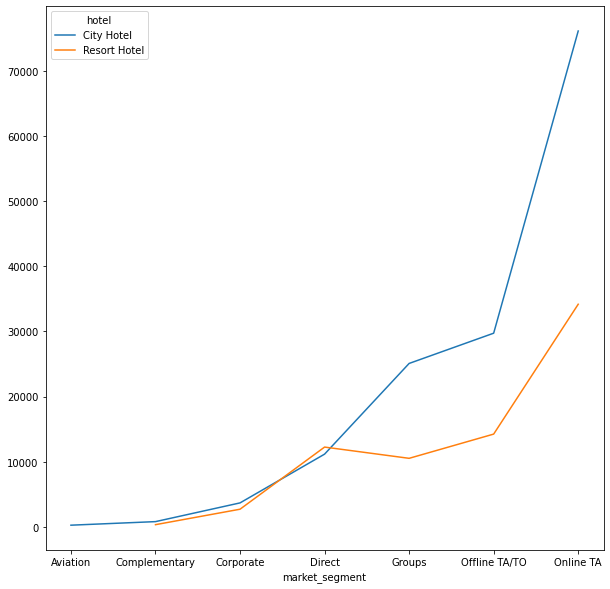

In [ ]:
# To plot hotelwise data of adults belonging to specific market_segment.
m2 = df_nonull.groupby(['market_segment', 'hotel']).sum()['adults']
m2.unstack().plot()

In [ ]:
# Defining new df for distribution channel
distribution_channel1 = df_nonull.groupby(['hotel', 'distribution_channel']).sum()['adults']

# Extracting pandas series out of this df to use it in plot
d_c = distribution_channel1[:4]
d_r = distribution_channel1[4:]

Text(0.5, 1.0, 'For Resort Hotel')

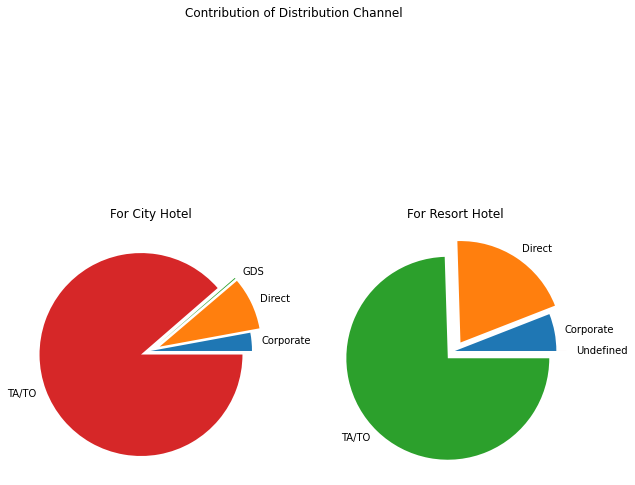

In [ ]:
# Plotting a pie chart of this data
label1 = ['Corporate', 'Direct', 'GDS', 'TA/TO'] # Need to search for an option to add labels automatically.
label2 = ['Corporate', 'Direct', 'TA/TO', 'Undefined']

explode = (0, 0.1, 0.1, 0.1)
plt.suptitle('Contribution of Distribution Channel') # To add the main title to the graph
# Need to remove this extra gap

# Subplot1: Pie chart for City Hotel
plt.subplot(1, 2, 1)
plt.pie(d_c, labels=label1, explode = explode)
plt.title('For City Hotel')

# Subplot2: Pie chart for Resort Hotel
plt.subplot(1, 2, 2)
plt.pie(d_r, labels=label2, explode = explode)
plt.title('For Resort Hotel')

For both the hotels, the distribution channel 'TA/TO' contributed the maximum.

**Now, looking for Repeated Customers**

In [ ]:
# Finding repeated customers
repeated_customer = df_nonull.copy()
repeated_customer['is_repeated_guest'] = repeated_customer['is_repeated_guest'].replace([0,1], ['No', 'Yes'])

In [ ]:
# Counting the total repeated customers
repeated_customer['is_repeated_guest'].value_counts()

No     115092
Yes      3806
Name: is_repeated_guest, dtype: int64

In [ ]:
hotelwise_repeated_customers = repeated_customer.groupby(['is_repeated_guest', 'hotel']).count()['adults']
print(hotelwise_repeated_customers)

is_repeated_guest  hotel       
No                 City Hotel      77270
                   Resort Hotel    37822
Yes                City Hotel       2032
                   Resort Hotel     1774
Name: adults, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


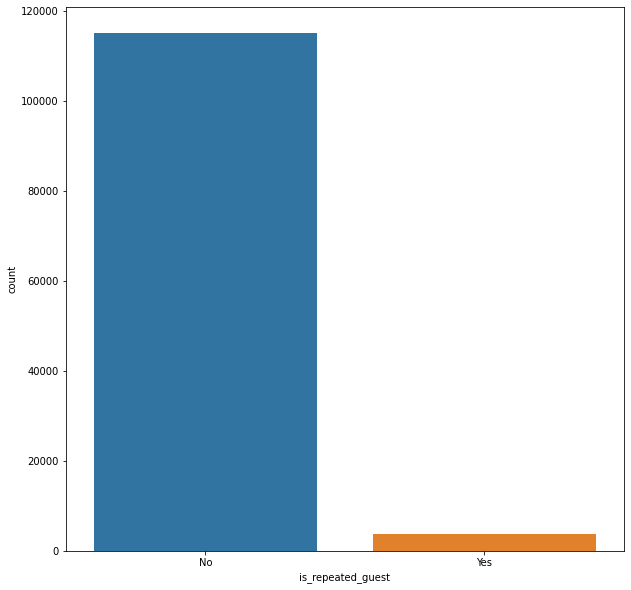

In [ ]:
# plot the repeated customers count plot (combied for hotels)
sns.countplot(repeated_customer['is_repeated_guest'])

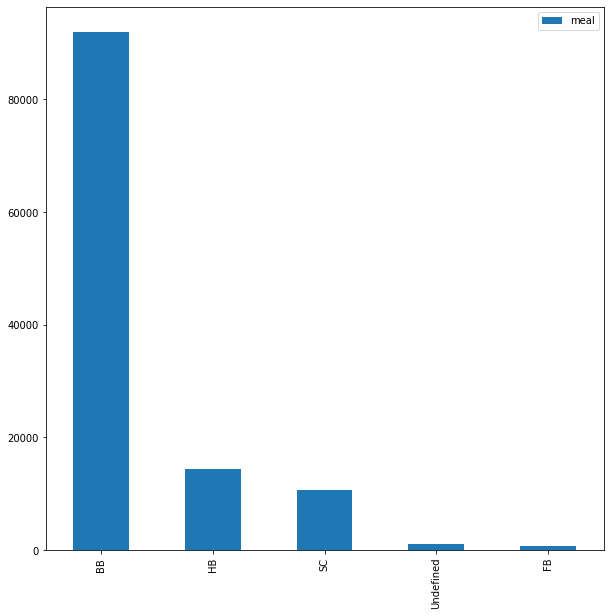

In [ ]:
# Plot for Meal types for both the hotels combined
df_nonull['meal'].value_counts().plot(kind = 'bar')
plt.legend(loc='upper right')

In [ ]:
df_nonull.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')